In [1]:
import matplotlib
import pylab
import matplotlib.pyplot as plt
import matplotlib
import h5py
import numpy as np
import os
import os.path
from CFDmodule import *
from readStep import *
from PIL import Image  
%matplotlib inline

In [7]:
#specify inout parameters here
gamma=5.0/3.0
g=1.0
Lz=3.2
waveLen = 0.4
Ly = waveLen
rho_l = 1
rho_h = 2
CFDmethod = False
#####input done

In [8]:
###calculate some parameters
dz=dy=dx=Lz/nz

if nx == 1:
    dx=1.0
    
horizon_lim = (0, Ly-dy)
vert_lim = (0, Lz-dz)
extent=horizon_lim+vert_lim

FieldPoint = h5file.get('Fields').values()
totalsteps, specout = get_LatestTime(FieldPoint)

step = []
for i in range(totalsteps/specout):
    step.append(str((i+1)*specout).zfill(6))
    
istep = str(totalsteps).zfill(6)

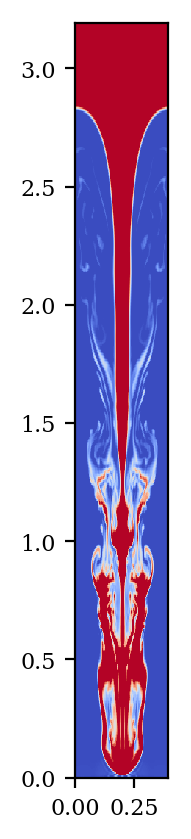

In [9]:
mylist = ['Fields/','Prho','/',istep]
filepath = delimiter.join(mylist)
databk = h5file.get(filepath)
rho = np.array(databk)
rho = np.transpose(rho)
rho = np.transpose(np.reshape(rho, (ny,nz)))

fig_pi = plt.figure(1, figsize = (5*1.214,5.0), dpi=200)
plt.rc('font', family='serif', size=8)
plt.imshow(rho, origin='none', extent=horizon_lim+vert_lim, aspect=1,
           cmap='coolwarm',vmin=rho_l,vmax=rho_h)


In [16]:
##store initial field
mylist = ['Fields/', 'Prho', '/', '000001']
filepath = delimiter.join(mylist)
rho0 = np.array(h5file.get(filepath))
mylist = ['Fields/', 'PPress', '/', '000001']
filepath = delimiter.join(mylist)
Press0 = np.array(h5file.get(filepath))
mylist = ['Fields/', 'PVz', '/', '000001']
filepath = delimiter.join(mylist)
Vz0 = np.array(h5file.get(filepath))

doing 3.2144005143 %


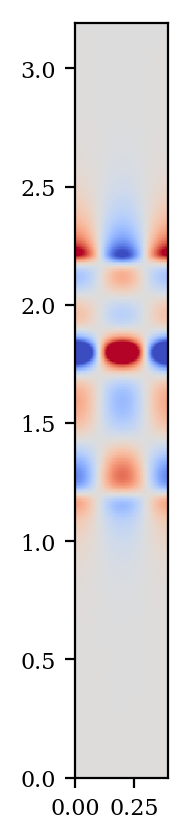

doing 6.42880102861 %


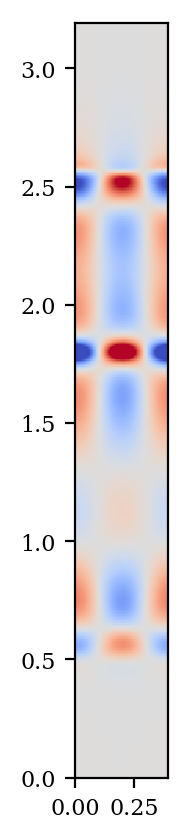

doing 9.64320154291 %


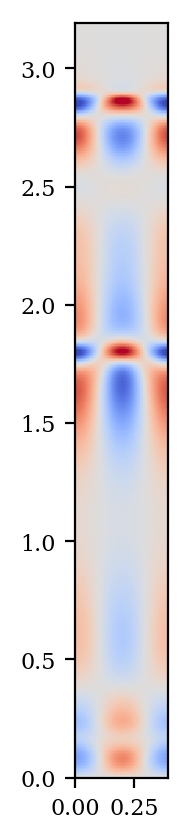

doing 12.8576020572 %


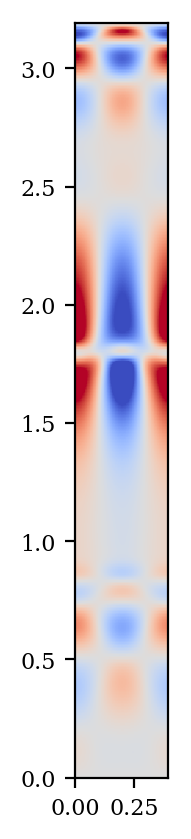

doing 16.0720025715 %


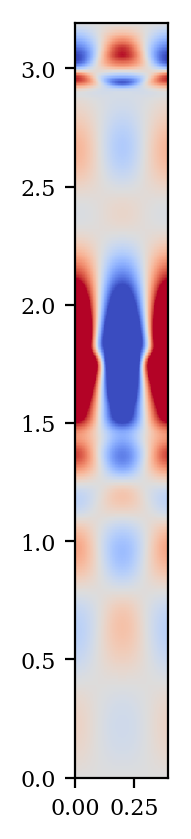

doing 19.2864030858 %


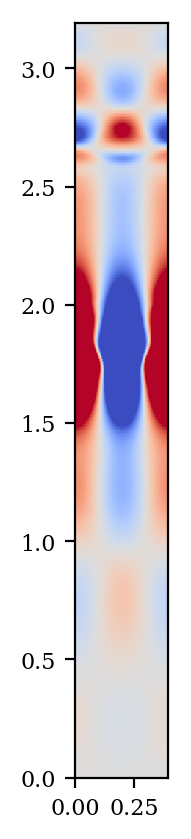

doing 22.5008036001 %


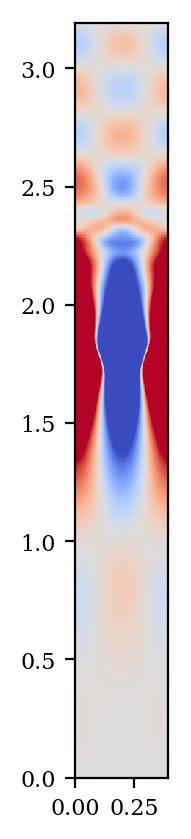

doing 25.7152041144 %


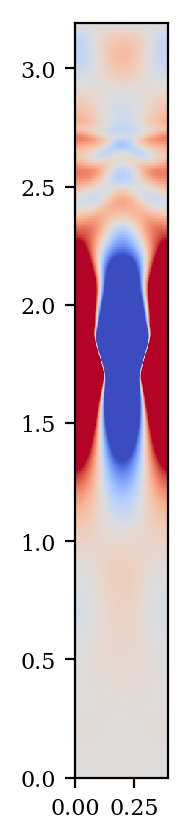

doing 28.9296046287 %


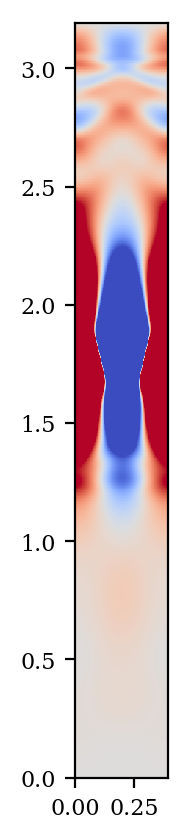

doing 32.144005143 %


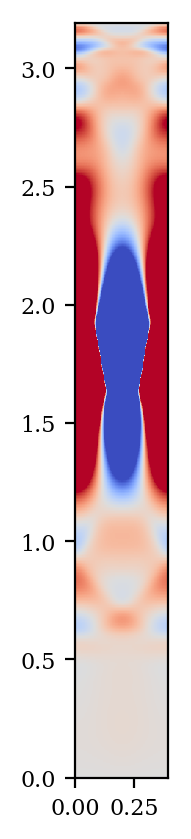

doing 35.3584056573 %


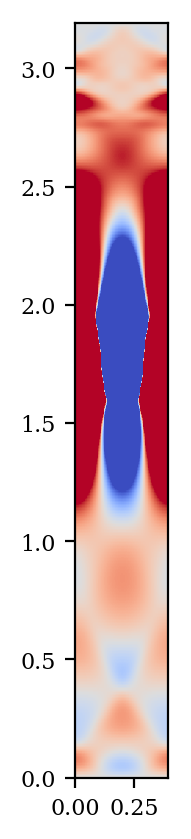

doing 38.5728061716 %


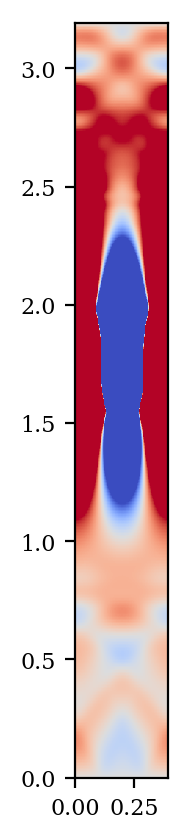

doing 41.787206686 %


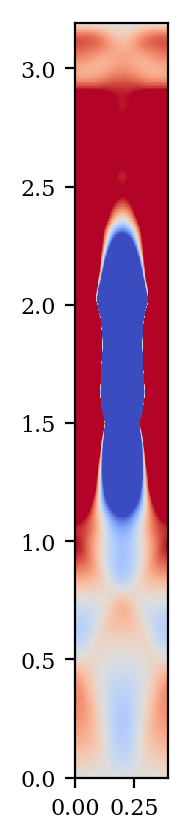

doing 45.0016072003 %


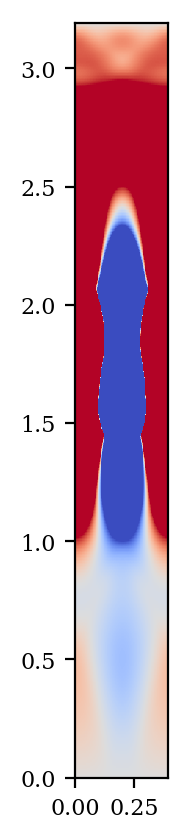

doing 48.2160077146 %


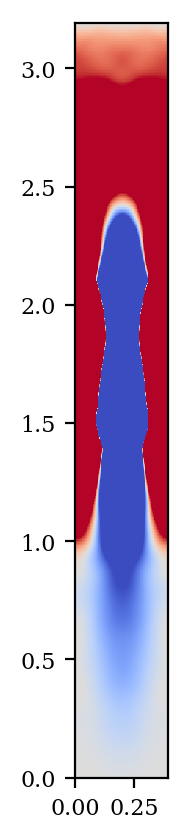

doing 51.4304082289 %


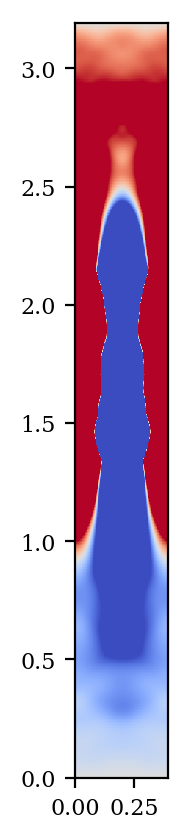

doing 54.6448087432 %


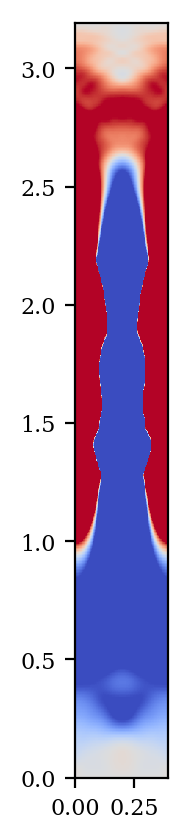

doing 57.8592092575 %


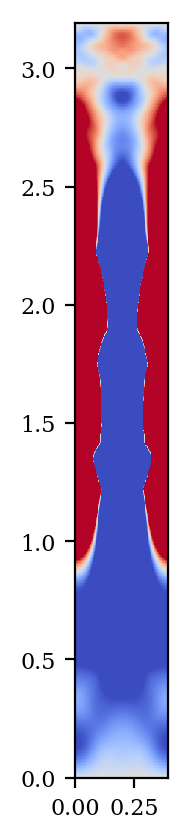

doing 61.0736097718 %


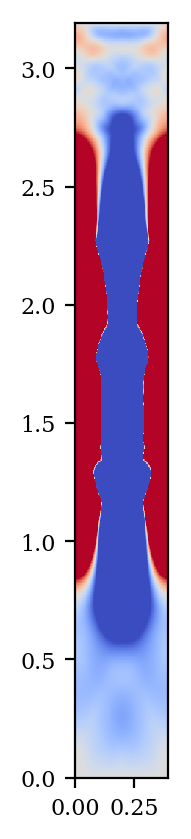

doing 64.2880102861 %


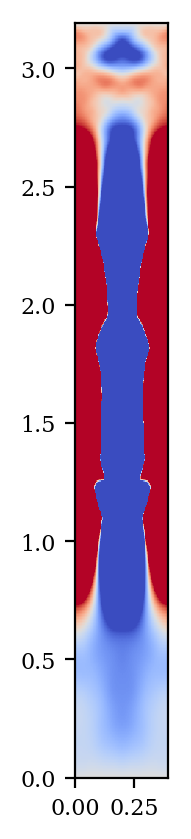

doing 67.5024108004 %


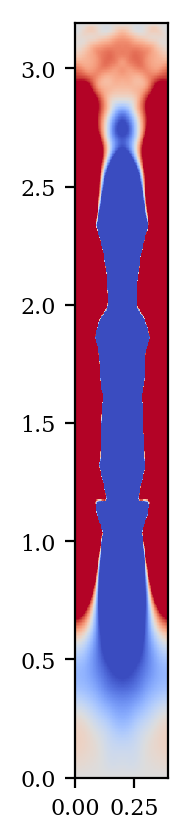

doing 70.7168113147 %


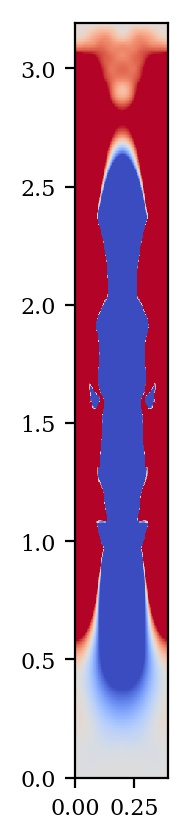

doing 73.931211829 %


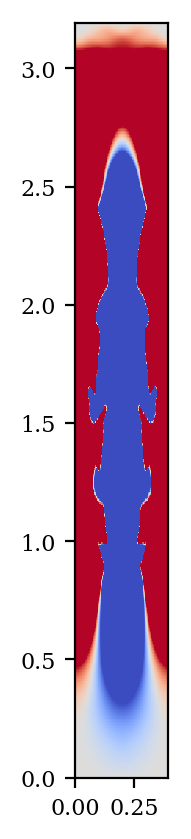

doing 77.1456123433 %


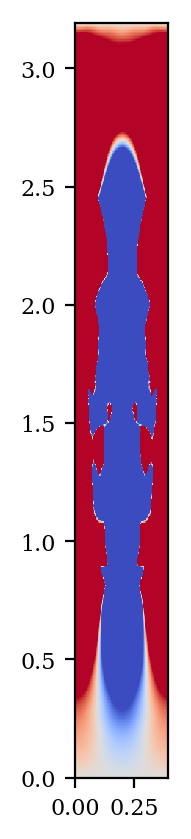

doing 80.3600128576 %


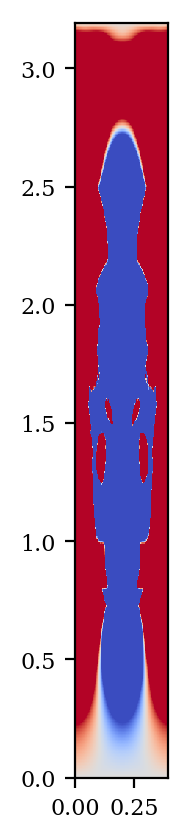

doing 83.5744133719 %


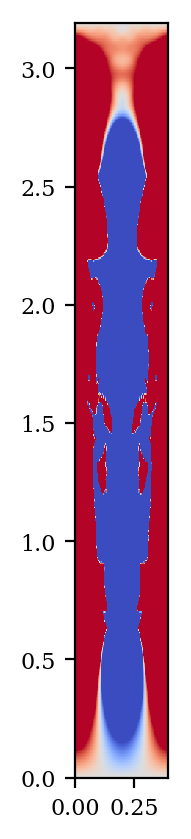

doing 86.7888138862 %


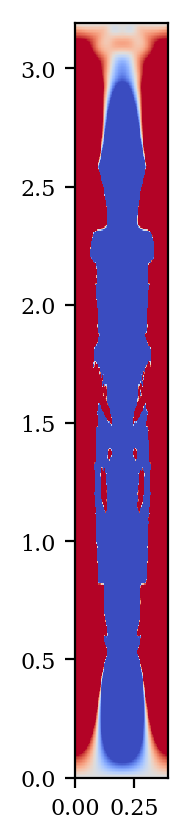

doing 90.0032144005 %


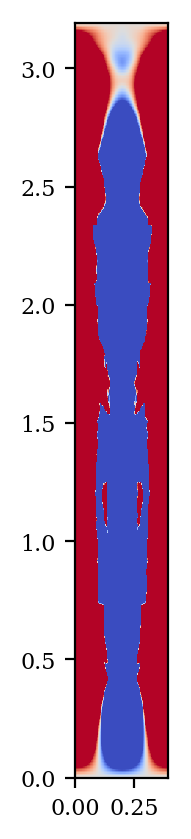

doing 93.2176149148 %


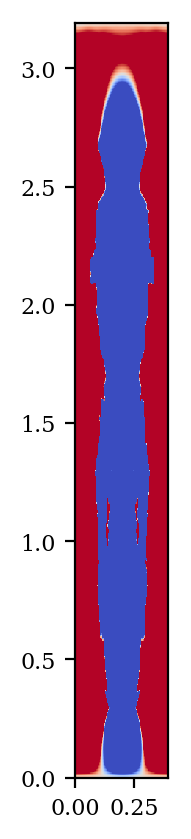

doing 96.4320154291 %


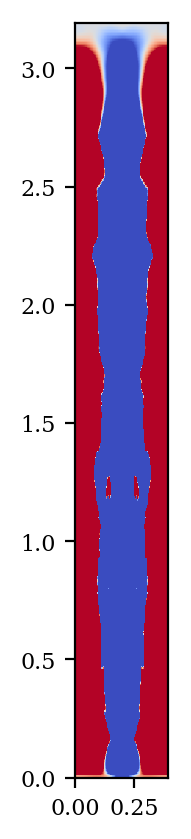

doing 99.6464159434 %


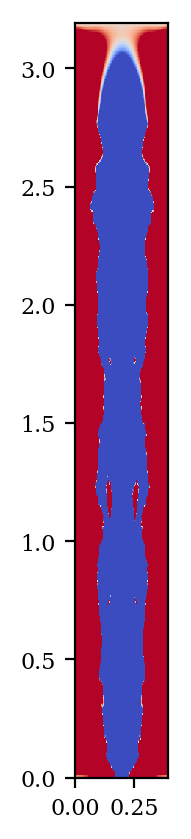

In [20]:
bub_loc_all = np.zeros(len(step))
bub_loc_all_ori = np.zeros(len(step))
sp_loc_all = np.zeros(len(step))
bub_velo_all = np.zeros(len(step))
bub_velo_all_aver = np.zeros(len(step))
sp_velo_all = np.zeros(len(step))
bub_velo_all_ori = np.zeros(len(step))

seq = 0

for istep in step:
    print "doing", float(istep)/totalsteps*100, "%"
    mylist = ['Fields/', 'PVz', '/', istep]
    filepath = delimiter.join(mylist)
    rho = np.array(h5file.get(filepath)) - Vz0
    rho = np.transpose(rho)
    rho = np.transpose(np.reshape(rho, (ny,nz)))

    fig_pi = plt.figure(1, figsize = (5*1.214,5.0), dpi=200)
    plt.rc('font', family='serif', size=8)
    plt.imshow(rho, origin='none', extent=horizon_lim+vert_lim, aspect=1,
           cmap='coolwarm',vmin=-0.01,vmax=0.01)
    plt.show()
    seq += 1
